In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

In [2]:
def simple_interest(principal, average_annual_return, year):
    return principal * (1 + average_annual_return * year)

def compound_interest(principal, average_annual_return, compoundings_per_year, year):
    return principal * (1 + average_annual_return / compoundings_per_year) ** (compoundings_per_year * year)

def comparison(principal, average_annual_return, years):
    simple_interest_values = [simple_interest(principal, average_annual_return, year) for year in years]
    compound_interest_values = [compound_interest(principal, average_annual_return, 12, year) for year in years]

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Plotting on the axis object
    ax.plot(years, simple_interest_values, label='Simple Interest', zorder=1)
    ax.plot(years, compound_interest_values, label='Compound Interest', zorder=1)

    # Show starting point (principal)
    ax.scatter(0, principal, color='green', zorder=5, label='Starting Point (Principal)')

    # Show ending points
    ax.scatter(years[-1], simple_interest_values[-1], color='blue', zorder=5, label='Ending Point (Simple Interest)')
    ax.scatter(years[-1], compound_interest_values[-1], color='orange', zorder=5, label='Ending Point (Compound Interest)')

    # Annotate the final y-values on the graph
    ax.annotate(f"${simple_interest_values[-1]:,.2f}", 
                (years[-1], simple_interest_values[-1]),
                textcoords="offset points", xytext=(0,10), ha='center', zorder=10)

    ax.annotate(f"${compound_interest_values[-1]:,.2f}", 
                (years[-1], compound_interest_values[-1]),
                textcoords="offset points", xytext=(0,10), ha='center', zorder=10)
    
    # Set the y-axis label format to USD
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlabel('Years')
    ax.set_ylabel('Interest Accumulated')
    ax.set_title(f'Simple vs Compound Interest - {years[-1]} years')
    ax.legend(loc='upper left')

    return fig, simple_interest_values, compound_interest_values

In [3]:
principal = 1000
average_annual_return = 0.05

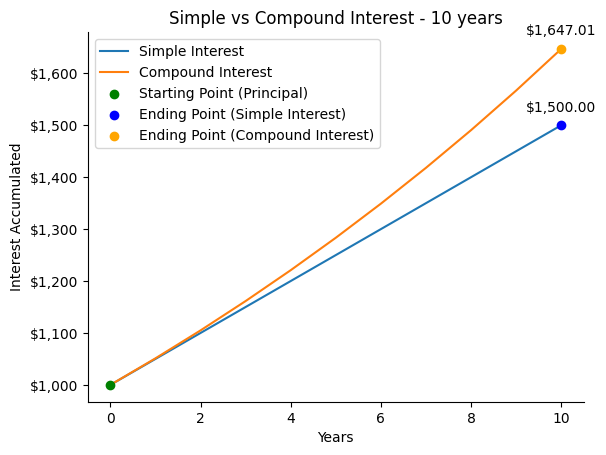

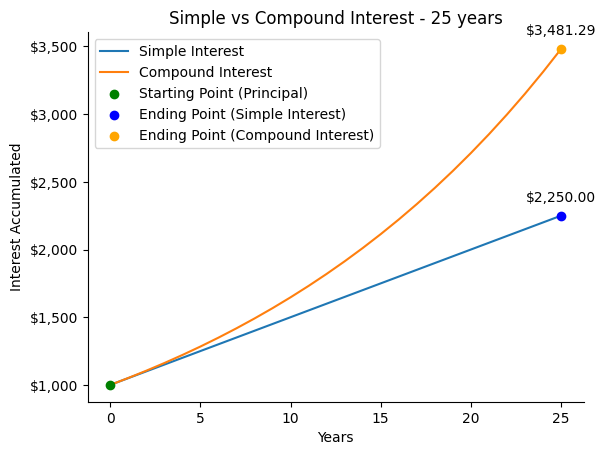

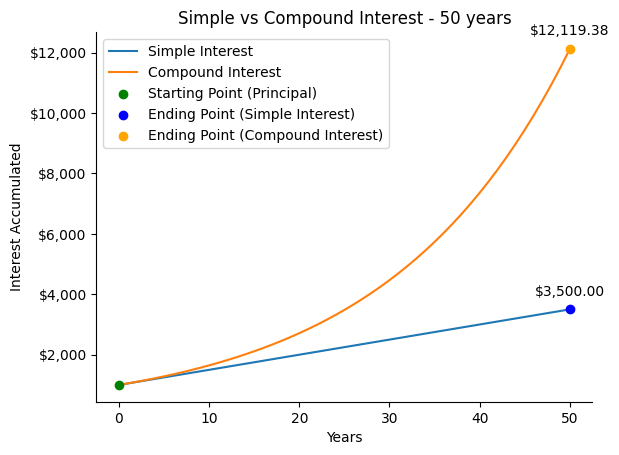

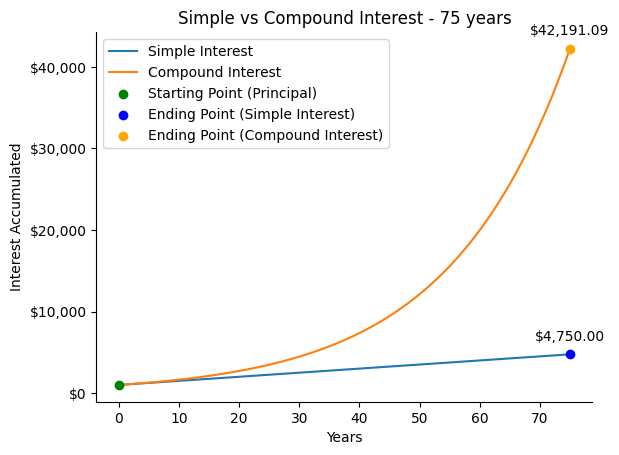

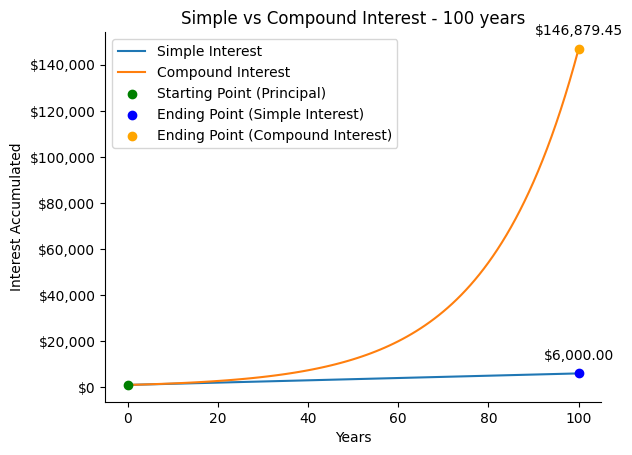

In [4]:
fig_10y, simp_10y, comp_10y  = comparison(principal, average_annual_return, range(0, 11))
fig_25y, simp_25y, comp_25y = comparison(principal, average_annual_return, range(0, 26))
fig_50y, simp_50y, comp_50y = comparison(principal, average_annual_return, range(0, 51))
fig_75y, simp_75y, comp_75y = comparison(principal, average_annual_return, range(0, 76))
fig_100y, simp_100y, comp_100y = comparison(principal, average_annual_return, range(0, 101))

In [5]:
if not os.path.exists('imgs'):
    os.makedirs('imgs')

fig_10y.savefig("imgs/fig_10y.png")
fig_25y.savefig("imgs/fig_25y.png")
fig_50y.savefig("imgs/fig_50y.png")
fig_75y.savefig("imgs/fig_75y.png")
fig_100y.savefig("imgs/fig_100y.png")

In [6]:
# Creating a dictionary with the data
data = {
    'Interest Type': ['10 Years', '25 Years', '50 Years', '75 Years', '100 Years'],
    'Simple - End (USD)': [simp_10y[-1], simp_25y[-1], simp_50y[-1], simp_75y[-1], simp_100y[-1]],
    'Compound - End (USD)': [comp_10y[-1], comp_25y[-1], comp_50y[-1], comp_75y[-1], comp_100y[-1]],
}

df = pd.DataFrame(data)

# Calculating the delta and adding it to the DataFrame
df['Delta (USD)'] = df['Compound - End (USD)'] - df['Simple - End (USD)']
df['Delta (%)'] = ((df['Compound - End (USD)'] / df['Simple - End (USD)'])-1) * 100

# setting .2f
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(df)

  Interest Type  Simple - End (USD)  Compound - End (USD)  Delta (USD)  \
0      10 Years             1500.00               1647.01       147.01   
1      25 Years             2250.00               3481.29      1231.29   
2      50 Years             3500.00              12119.38      8619.38   
3      75 Years             4750.00              42191.09     37441.09   
4     100 Years             6000.00             146879.45    140879.45   

   Delta (%)  
0       9.80  
1      54.72  
2     246.27  
3     788.23  
4    2347.99  
